<a href="https://colab.research.google.com/github/jm5159/E4511-2021-Mao/blob/master/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install AMPL packages

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
! wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
! chmod +x Anaconda3-2019.10-Linux-x86_64.sh
! bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local

# ! wget -c https://repo.anaconda.com/miniconda/Miniconda3-py37_4.9.2-Linux-x86_64.sh 
# ! chmod +x Miniconda3-py37_4.9.2-Linux-x86_64.sh
# ! time bash Miniconda3-py37_4.9.2-Linux-x86_64.sh -b -f -p /usr/local

! time conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
import deepchem as dc

# install mordred, bravado and molvs
! time conda install -c conda-forge -y mordred bravado molvs

# get the Install AMPL_GPU_test.sh
!wget https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh

# run the script to install AMPL
! chmod u+x install_AMPL_GPU_test.sh
! ./install_AMPL_GPU_test.sh

--2021-04-01 18:00:53--  https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530308481 (506M) [application/x-sh]
Saving to: ‘Anaconda3-2019.10-Linux-x86_64.sh’

Anaconda3-2019.10-L 100%[===================>] 505.74M   203MB/s    in 2.5s    

2021-04-01 18:00:56 (203 MB/s) - ‘Anaconda3-2019.10-Linux-x86_64.sh’ saved [530308481/530308481]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _ipyw_jlab_nb_ext_conf==0.1.0=py37_0
    - _libgcc_mutex==0.1=main
    - alabaster==0.7.12=py37_0
    - anaconda-client==1.7.2=py37_0
    - anaconda-navigator==1.9.7=py37_0
    - anaconda-pr

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.


InvalidVersionSpec: Invalid version '4.19.112+': empty version component


real	0m6.684s
user	0m5.725s
sys	0m1.115s
--2021-04-01 18:07:03--  https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1100 (1.1K) [text/plain]
Saving to: ‘install_AMPL_GPU_test.sh’

install_AMPL_GPU_te 100%[===================>]   1.07K

In [3]:
# Load AMPL in this notebook

site_packages_path = '/content/AMPL/lib/python3.7/site-packages'
if site_packages_path not in sys.path:
  sys.path.insert(1, site_packages_path)
sys.path

['/tensorflow-1.15.2/python3.7',
 '/content/AMPL/lib/python3.7/site-packages',
 '',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/usr/local/lib/python3.7/site-packages/']

In [4]:
if 'cffi' in sys.modules:
  del sys.modules['cffi']

In [29]:
!wget https://raw.githubusercontent.com/jm5159/E4511-2021-Mao/master/Dataset/CYP3A4_cur_delaney.csv

--2021-04-01 18:26:13--  https://raw.githubusercontent.com/jm5159/E4511-2021-Mao/master/Dataset/CYP3A4_cur_delaney.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3924905 (3.7M) [text/plain]
Saving to: ‘CYP3A4_cur_delaney.csv’

CYP3A4_cur_delaney. 100%[===================>]   3.74M  22.6MB/s    in 0.2s    

2021-04-01 18:26:13 (22.6 MB/s) - ‘CYP3A4_cur_delaney.csv’ saved [3924905/3924905]



In [6]:
!pip install hyperopt

     |████████████████████████████████| 972kB 2.0MB/s 


In [12]:
!pip install bravado

     |████████████████████████████████| 71kB 2.8MB/s 
     |████████████████████████████████| 133kB 10.8MB/s 
  Created wheel for strict-rfc3339: filename=strict_rfc3339-0.7-cp37-none-any.whl size=18120 sha256=f9072287fa263cff79cc352609a1d0de8f6732e9ff622cbfcb9826c39d711dc0
  Stored in directory: /root/.cache/pip/wheels/bb/af/c9/b6e9fb5f9b2470e4ed2a7241c9ab3a8cdd3bc8555ae02ca2e6
Successfully built strict-rfc3339


### Load packages and dataset

In [13]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_context("poster")
sns.set_style("whitegrid")
sns.set_palette("Set2")

import pandas as pd
import os, json, sys, glob, pickle

from atomsci.ddm.pipeline import parameter_parser as parse
import atomsci.ddm.pipeline.model_pipeline as mp
from atomsci.ddm.pipeline import perf_data

from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

In [30]:
h1 = pd.read_csv("CYP3A4_cur_delaney.csv")

In [31]:
h1

,Unnamed: 0,compound_id,base_rdkit_smiles,relation,pXC50,active,rdkit_smiles,inchi_key,Compound_ID,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate
0,0,CHEMBL1537880,Cc1ccc(-c2nnc(C)c(N3CC(C)OC(C)C3)n2)cc1,NaN,5.300000,0,Cc1ccc(-c2nnc(C)c(N3CC(C)OC(C)C3)n2)cc1,WNUWUYIZADTROQ-UHFFFAOYSA-N,WNUWUYIZADTROQ-UHFFFAOYSA-N,5.300000,NaN,0.0,0
1,1,CHEMBL1515033,CS(=O)(=O)N1CCC[C@@]2(CCN(c3ccncc3)C2)C1,NaN,5.100000,0,CS(=O)(=O)N1CCC[C@@]2(CCN(c3ccncc3)C2)C1,LFQJIVPPRFXMAC-AWEZNQCLSA-N,LFQJIVPPRFXMAC-AWEZNQCLSA-N,5.100000,NaN,0.0,0
2,2,CHEMBL3422242,Cc1cc([C@H]2C[C@H]3[C@@H](C)SC(N)=N[C@@]3(c3cc...,<,4.522879,0,Cc1cc([C@H]2C[C@H]3[C@@H](C)SC(N)=N[C@@]3(c3cc...,HVEVDFRWOQHAPJ-CKMNQQOVSA-N,HVEVDFRWOQHAPJ-CKMNQQOVSA-N,4.522879,NaN,0.0,0
3,3,CHEMBL1526043,N#Cc1cccc(-c2nc3cnc(N4CCOCC4)nc3n(C3CC3)c2=O)c1,NaN,4.400000,0,N#Cc1cccc(-c2nc3cnc(N4CCOCC4)nc3n(C3CC3)c2=O)c1,QIZLBSOCEJVBTG-UHFFFAOYSA-N,QIZLBSOCEJVBTG-UHFFFAOYSA-N,4.400000,NaN,0.0,0
4,4,CHEMBL3145019,Cc1nn(C(C)(C)C)c(O)c1Sc1ccc(Cl)cc1,NaN,4.800000,0,Cc1nn(C(C)(C)C)c(O)c1Sc1ccc(Cl)cc1,IYIGLQSFYOLXCS-UHFFFAOYSA-N,IYIGLQSFYOLXCS-UHFFFAOYSA-N,4.800000,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18637,19631,CHEMBL3932169,CC(C)[C@@H]1c2nn(-c3cccc(S(C)(=O)=O)c3)cc2CN1c...,NaN,5.515700,0,CC(C)[C@@H]1c2nn(-c3cccc(S(C)(=O)=O)c3)cc2CN1c...,NCZXBZJVJRJUSC-GOSISDBHSA-N,NCZXBZJVJRJUSC-GOSISDBHSA-N,5.515700,NaN,0.0,0
18638,19632,CHEMBL4210866,N[C@@H]1CCC=C(c2ccc(F)cc2)[C@H]1CNc1cc(F)c(S(=...,NaN,4.481486,0,N[C@@H]1CCC=C(c2ccc(F)cc2)[C@H]1CNc1cc(F)c(S(=...,BSNVRJYSKXDALK-VQIMIIECSA-N,BSNVRJYSKXDALK-VQIMIIECSA-N,4.481486,NaN,0.0,0
18639,19633,CHEMBL1465534,O=[N+]([O-])c1cccc(-c2nnn(C34CC5CC(CC(C5)C3)C4...,NaN,5.050000,0,O=[N+]([O-])c1cccc(-c2nnn(C34CC5CC(CC(C5)C3)C4...,ILMKPNZNEYHDGO-UHFFFAOYSA-N,ILMKPNZNEYHDGO-UHFFFAOYSA-N,5.050000,NaN,0.0,0
18640,19634,CHEMBL3237445,Cc1nccc2c3cnc(Nc4ccc(N5CCNCC5)cn4)nc3n(C3CCCC3...,<,5.000000,0,Cc1nccc2c3cnc(Nc4ccc(N5CCNCC5)cn4)nc3n(C3CCCC3...,FLNHSHVOGZEONH-UHFFFAOYSA-N,FLNHSHVOGZEONH-UHFFFAOYSA-N,5.000000,NaN,0.0,0


In [32]:
h1.shape

(18642, 13)

### Split the dataset

In [34]:
train_file = "CYP3A4_cur_delaney.csv"
response_col = "VALUE_NUM_mean"
compound_id = "compound_id"
smiles_col = "rdkit_smiles"

params = {
        "system": "LC",
        "lc_account": 'None',
        "datastore": "False",
        "save_results": "False",
        "data_owner": "username",
        "prediction_type": "regression",
        "dataset_key": train_file,
        "id_col": compound_id,
        "smiles_col": smiles_col,
        "response_cols": response_col,
        "previously_split": "False",
        "split_only": "True",
        "featurizer": "ecfp",
        "model_type": "RF",
        "verbose": "True",
        "transformers": "True",
        'max_epochs': '70',
        "rerun": "False",
        "result_dir": "split"
    }

ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)
pl.train_model()

number of features: 1024


2021-04-01 18:28:01,630 Splitting data by scaffold
2021-04-01 18:28:13,906 Dataset split table saved to /CYP3A4_cur_delaney_train_valid_test_scaffold_214d2c78-8942-4a29-844f-755b7e6be275.csv


### Train an initial model

In [35]:
listing = glob.glob(os.path.join("/", "CYP3A4_cur_delaney_train_valid_test_scaffold_*"))
name = listing[0]
split_uuid = name.split("_")[-1].split(".")[0]
response_col = "VALUE_NUM_mean"

params = {
        "system": "LC",
        "lc_account": 'None',
        "datastore": "False",
        "save_results": "False",
        "data_owner": "username",
        "prediction_type": "regression",
        "dataset_key": train_file,
        "id_col": compound_id,
        "smiles_col": smiles_col,
        "response_cols": response_col,
        "split_uuid": split_uuid,
        "previously_split": "True",
        "featurizer": "ecfp",
        "model_type": "RF",
        "verbose": "True",
        "transformers": "True",
        'max_epochs': '70',
        "rerun": "False",
        "result_dir": "ampl_output"
    }

In [36]:
ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)
pl.train_model()

number of features: 1024


2021-04-01 18:30:49,582 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.641 s
Loading dataset from disk.
TIMING: dataset construction took 0.085 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 18:31:25,872 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/5d66d447-92b0-489d-96ca-d20b0773ac7d/model_metadata.json
2021-04-01 18:31:31,043 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/5d66d447-92b0-489d-96ca-d20b0773ac7d/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_5d66d447-92b0-489d-96ca-d20b0773ac7d.tar.gz


In [37]:
pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
pred_results = pred_data.get_prediction_results()
print(f"R2 score of validation set: {pred_results['r2_score']:.3f}")

R2 score of validation set: 0.017


### Train an model with uncertainty prediction

In [38]:
listing = glob.glob(os.path.join("/", "CYP3A4_cur_delaney_train_valid_test_scaffold_*"))
name = listing[0]
split_uuid = name.split("_")[-1].split(".")[0]
response_col = "VALUE_NUM_mean"

params = {
        "system": "LC",
        "lc_account": 'None',
        "datastore": "False",
        "save_results": "False",
        "data_owner": "username",
        "prediction_type": "regression",
        "dataset_key": train_file,
        "id_col": compound_id,
        "smiles_col": smiles_col,
        "response_cols": response_col,
        "split_uuid": split_uuid,
        "previously_split": "True",
        "featurizer": "ecfp",
        "model_type": "RF",
        "verbose": "True",
        "transformers": "True",
        'max_epochs': '70',
        "rerun": "False",
        "result_dir": "ampl_output",
        "uncertainty": "True"
    }

In [39]:
ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)
pl.train_model()

number of features: 1024


2021-04-01 18:33:17,295 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.651 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.085 s
Loading dataset from disk.


2021-04-01 18:33:52,793 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/b6affb9a-b4e9-4426-8758-237d6e5ba721/model_metadata.json
2021-04-01 18:33:57,929 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/b6affb9a-b4e9-4426-8758-237d6e5ba721/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_b6affb9a-b4e9-4426-8758-237d6e5ba721.tar.gz


In [40]:
pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
pred_results = pred_data.get_prediction_results()
print(f"R2 score of validation set: {pred_results['r2_score']:.3f}")

R2 score of validation set: 0.017


In [41]:
pred_df = pl.predict_on_dataframe(h1)
pred_df = pred_df.merge(h1[["rdkit_smiles", "VALUE_NUM_mean"]], on="rdkit_smiles")
pred_df = pred_df.assign(pred_error=pred_df.VALUE_NUM_mean-pred_df.pred)

2021-04-01 18:34:41,111 Featurizing data...
2021-04-01 18:35:51,958 Done


number of features: 1024
TIMING: dataset construction took 1.014 s
Loading dataset from disk.


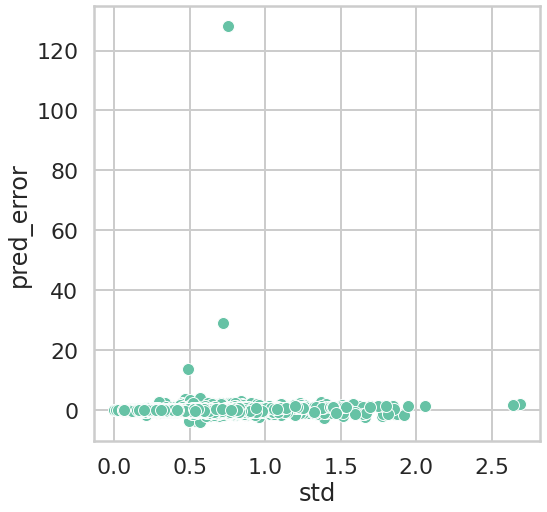

In [42]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
sns.scatterplot(data=pred_df, x="std", y="pred_error", ax=ax)

### Grid search
#### Tunable parameters for Random Forest models
- rf_estimators: number of estimators to use in random forest models
- rf_max_depth: the maximum depth of a decision tree in the random forest
- rf_max_features: max number of features to split random forest nodes

In [44]:
estimators = [16,32,64,128]
depth=[16,32,64,128]
features=[16,32,64,128]

rfe_list = []
rfd_list = []
rff_list = []
valid_r2_list = []
for rf_estimator in estimators:
    for rf_depth in depth:
        for rf_feature in features:
            params["rf_estimators"] = rf_estimator
            params["rf_max_depth"] = rf_depth
            params["rf_max_features"] = rf_feature
            rfe_list.append(rf_estimator)
            rfd_list.append(rf_depth)
            rff_list.append(rf_feature)
            tp = parse.wrapper(params)
            pl = mp.ModelPipeline(tp)
            pl.train_model()
            pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
            pred_results = pred_data.get_prediction_results()
            valid_r2 = pred_results['r2_score']
            valid_r2_list.append(valid_r2)
            print(f"rf_estimators: {rf_estimator}, rf_max_depth: {rf_depth}, rf_max_features: {rf_feature}, valid_r2: {valid_r2}")

number of features: 1024


2021-04-01 19:23:24,603 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.672 s
Loading dataset from disk.
TIMING: dataset construction took 0.090 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 19:23:29,989 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/ecbaca03-0b25-4ab4-8500-5e62784db823/model_metadata.json
2021-04-01 19:23:30,018 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/ecbaca03-0b25-4ab4-8500-5e62784db823/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_ecbaca03-0b25-4ab4-8500-5e62784db823.tar.gz
rf_estimators: 16, rf_max_depth: 16, rf_max_features: 16, valid_r2: 0.011040170470989596
number of features: 1024


2021-04-01 19:24:45,568 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.670 s
Loading dataset from disk.
TIMING: dataset construction took 0.090 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 19:24:51,145 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/ad887d1a-7a3d-40f3-b0fe-8154af3bef07/model_metadata.json
2021-04-01 19:24:51,175 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/ad887d1a-7a3d-40f3-b0fe-8154af3bef07/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_ad887d1a-7a3d-40f3-b0fe-8154af3bef07.tar.gz
rf_estimators: 16, rf_max_depth: 16, rf_max_features: 32, valid_r2: 0.018579425354828483
number of features: 1024


2021-04-01 19:26:06,890 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.681 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.


2021-04-01 19:26:12,791 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/9095087e-1781-4602-b63b-1e7f0ff2150d/model_metadata.json
2021-04-01 19:26:12,821 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/9095087e-1781-4602-b63b-1e7f0ff2150d/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_9095087e-1781-4602-b63b-1e7f0ff2150d.tar.gz
rf_estimators: 16, rf_max_depth: 16, rf_max_features: 64, valid_r2: 0.014545385746824624
number of features: 1024


2021-04-01 19:27:28,487 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.676 s
Loading dataset from disk.
TIMING: dataset construction took 0.090 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.


2021-04-01 19:27:35,174 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/4b466f93-7724-465f-a96f-81a498a0f4fd/model_metadata.json
2021-04-01 19:27:35,202 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/4b466f93-7724-465f-a96f-81a498a0f4fd/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_4b466f93-7724-465f-a96f-81a498a0f4fd.tar.gz
rf_estimators: 16, rf_max_depth: 16, rf_max_features: 128, valid_r2: 0.011518881629171362
number of features: 1024


2021-04-01 19:28:50,804 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.688 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 19:28:56,367 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/337e2965-d389-4c77-b399-324eb8064e7f/model_metadata.json
2021-04-01 19:28:56,457 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/337e2965-d389-4c77-b399-324eb8064e7f/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_337e2965-d389-4c77-b399-324eb8064e7f.tar.gz
rf_estimators: 16, rf_max_depth: 32, rf_max_features: 16, valid_r2: 0.012787020850723918
number of features: 1024


2021-04-01 19:30:11,860 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.682 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 19:30:17,702 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/69d406d8-8a7f-4e87-ab64-b48991a10fd5/model_metadata.json
2021-04-01 19:30:17,783 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/69d406d8-8a7f-4e87-ab64-b48991a10fd5/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_69d406d8-8a7f-4e87-ab64-b48991a10fd5.tar.gz
rf_estimators: 16, rf_max_depth: 32, rf_max_features: 32, valid_r2: 0.017654771311625073
number of features: 1024


2021-04-01 19:31:33,696 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.667 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
TIMING: dataset construction took 0.093 s
Loading dataset from disk.


2021-04-01 19:31:40,050 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/ceaf3421-1857-4eb9-818f-21f874cf0a1e/model_metadata.json
2021-04-01 19:31:40,139 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/ceaf3421-1857-4eb9-818f-21f874cf0a1e/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_ceaf3421-1857-4eb9-818f-21f874cf0a1e.tar.gz
rf_estimators: 16, rf_max_depth: 32, rf_max_features: 64, valid_r2: 0.017145309292570743
number of features: 1024


2021-04-01 19:32:56,378 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.679 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 19:33:03,920 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/bf3d3669-440d-4ba8-91af-25de45b44a86/model_metadata.json
2021-04-01 19:33:04,005 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/bf3d3669-440d-4ba8-91af-25de45b44a86/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_bf3d3669-440d-4ba8-91af-25de45b44a86.tar.gz
rf_estimators: 16, rf_max_depth: 32, rf_max_features: 128, valid_r2: 0.014526029035432098
number of features: 1024


2021-04-01 19:34:19,645 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.673 s
Loading dataset from disk.
TIMING: dataset construction took 0.091 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 19:34:25,484 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/804ea4f6-5d8c-4ff0-b22a-0bb2f5146915/model_metadata.json
2021-04-01 19:34:25,637 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/804ea4f6-5d8c-4ff0-b22a-0bb2f5146915/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_804ea4f6-5d8c-4ff0-b22a-0bb2f5146915.tar.gz
rf_estimators: 16, rf_max_depth: 64, rf_max_features: 16, valid_r2: 0.01280530026306348
number of features: 1024


2021-04-01 19:35:41,258 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.704 s
Loading dataset from disk.
TIMING: dataset construction took 0.100 s
Loading dataset from disk.
TIMING: dataset construction took 0.101 s
Loading dataset from disk.


2021-04-01 19:35:47,588 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/ff57c1b6-d76a-42bf-9ea9-9ed7569b8145/model_metadata.json
2021-04-01 19:35:47,741 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/ff57c1b6-d76a-42bf-9ea9-9ed7569b8145/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_ff57c1b6-d76a-42bf-9ea9-9ed7569b8145.tar.gz
rf_estimators: 16, rf_max_depth: 64, rf_max_features: 32, valid_r2: 0.014704570703955033
number of features: 1024


2021-04-01 19:37:03,447 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.661 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 19:37:10,124 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/88104f69-803e-48a0-b95f-6db324e649d1/model_metadata.json
2021-04-01 19:37:10,271 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/88104f69-803e-48a0-b95f-6db324e649d1/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_88104f69-803e-48a0-b95f-6db324e649d1.tar.gz
rf_estimators: 16, rf_max_depth: 64, rf_max_features: 64, valid_r2: 0.01677630545047537
number of features: 1024


2021-04-01 19:38:26,041 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.665 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 19:38:33,985 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/0273cec3-29f1-4069-bb3d-14078f648140/model_metadata.json
2021-04-01 19:38:34,129 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/0273cec3-29f1-4069-bb3d-14078f648140/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_0273cec3-29f1-4069-bb3d-14078f648140.tar.gz
rf_estimators: 16, rf_max_depth: 64, rf_max_features: 128, valid_r2: 0.016282368273639714
number of features: 1024


2021-04-01 19:39:49,813 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.664 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 19:39:55,634 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/22195f19-5d44-4055-8e97-8f1cc8d43b16/model_metadata.json
2021-04-01 19:39:55,803 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/22195f19-5d44-4055-8e97-8f1cc8d43b16/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_22195f19-5d44-4055-8e97-8f1cc8d43b16.tar.gz
rf_estimators: 16, rf_max_depth: 128, rf_max_features: 16, valid_r2: 0.014811783365850206
number of features: 1024


2021-04-01 19:41:11,813 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.708 s
Loading dataset from disk.
TIMING: dataset construction took 0.096 s
Loading dataset from disk.
TIMING: dataset construction took 0.094 s
Loading dataset from disk.


2021-04-01 19:41:18,085 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/546d7af8-5ca5-4b5c-9dc0-331a4dbe5217/model_metadata.json
2021-04-01 19:41:18,249 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/546d7af8-5ca5-4b5c-9dc0-331a4dbe5217/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_546d7af8-5ca5-4b5c-9dc0-331a4dbe5217.tar.gz
rf_estimators: 16, rf_max_depth: 128, rf_max_features: 32, valid_r2: 0.014587208281410802
number of features: 1024


2021-04-01 19:42:33,913 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.671 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 19:42:40,629 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/4266a559-3b10-4c06-8bea-6d308653cf1f/model_metadata.json
2021-04-01 19:42:40,791 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/4266a559-3b10-4c06-8bea-6d308653cf1f/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_4266a559-3b10-4c06-8bea-6d308653cf1f.tar.gz
rf_estimators: 16, rf_max_depth: 128, rf_max_features: 64, valid_r2: 0.014798091933570179
number of features: 1024


2021-04-01 19:43:56,454 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.661 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.


2021-04-01 19:44:04,293 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/ee4fba46-74a8-4cca-8288-9b127f52c39b/model_metadata.json
2021-04-01 19:44:04,449 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/ee4fba46-74a8-4cca-8288-9b127f52c39b/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_ee4fba46-74a8-4cca-8288-9b127f52c39b.tar.gz
rf_estimators: 16, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.014420228767223264
number of features: 1024


2021-04-01 19:45:20,092 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.666 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 19:45:25,679 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/40e4a9ce-1e8d-49de-8ede-d184d33e38f4/model_metadata.json
2021-04-01 19:45:25,729 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/40e4a9ce-1e8d-49de-8ede-d184d33e38f4/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_40e4a9ce-1e8d-49de-8ede-d184d33e38f4.tar.gz
rf_estimators: 32, rf_max_depth: 16, rf_max_features: 16, valid_r2: 0.010981571506274879
number of features: 1024


2021-04-01 19:46:41,883 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.675 s
Loading dataset from disk.
TIMING: dataset construction took 0.098 s
Loading dataset from disk.
TIMING: dataset construction took 0.099 s
Loading dataset from disk.


2021-04-01 19:46:47,897 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/8e65c928-c9e9-492b-9db3-f9e6d71c2943/model_metadata.json
2021-04-01 19:46:47,948 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/8e65c928-c9e9-492b-9db3-f9e6d71c2943/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_8e65c928-c9e9-492b-9db3-f9e6d71c2943.tar.gz
rf_estimators: 32, rf_max_depth: 16, rf_max_features: 32, valid_r2: 0.012627836072066523
number of features: 1024


2021-04-01 19:48:03,548 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.664 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 19:48:09,913 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/74558c3d-8078-4f9b-a853-3541a9332ee9/model_metadata.json
2021-04-01 19:48:09,966 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/74558c3d-8078-4f9b-a853-3541a9332ee9/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_74558c3d-8078-4f9b-a853-3541a9332ee9.tar.gz
rf_estimators: 32, rf_max_depth: 16, rf_max_features: 64, valid_r2: 0.014436386418714142
number of features: 1024


2021-04-01 19:49:25,610 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.665 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.


2021-04-01 19:49:33,210 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/f429335d-a948-49e6-9b6a-9c7ac47f6c4c/model_metadata.json
2021-04-01 19:49:33,261 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/f429335d-a948-49e6-9b6a-9c7ac47f6c4c/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_f429335d-a948-49e6-9b6a-9c7ac47f6c4c.tar.gz
rf_estimators: 32, rf_max_depth: 16, rf_max_features: 128, valid_r2: 0.013080161228513187
number of features: 1024


2021-04-01 19:50:49,144 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.663 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.


2021-04-01 19:50:55,257 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/09b81892-5f7c-4428-9599-89e285d62d99/model_metadata.json
2021-04-01 19:50:55,465 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/09b81892-5f7c-4428-9599-89e285d62d99/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_09b81892-5f7c-4428-9599-89e285d62d99.tar.gz
rf_estimators: 32, rf_max_depth: 32, rf_max_features: 16, valid_r2: 0.015268768703438962
number of features: 1024


2021-04-01 19:52:11,455 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.660 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.


2021-04-01 19:52:18,027 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/1f595b8e-af4d-4b97-9203-4bcfc0fe1aee/model_metadata.json
2021-04-01 19:52:18,195 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/1f595b8e-af4d-4b97-9203-4bcfc0fe1aee/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_1f595b8e-af4d-4b97-9203-4bcfc0fe1aee.tar.gz
rf_estimators: 32, rf_max_depth: 32, rf_max_features: 32, valid_r2: 0.015598244102338787
number of features: 1024


2021-04-01 19:53:33,950 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.665 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.


2021-04-01 19:53:41,276 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/6eb97360-fc32-4f47-881b-6198d4d2c38a/model_metadata.json
2021-04-01 19:53:41,443 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/6eb97360-fc32-4f47-881b-6198d4d2c38a/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_6eb97360-fc32-4f47-881b-6198d4d2c38a.tar.gz
rf_estimators: 32, rf_max_depth: 32, rf_max_features: 64, valid_r2: 0.013461260911228567
number of features: 1024


2021-04-01 19:54:56,946 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.668 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 19:55:06,131 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/8c8ee946-f4ef-4888-855c-21aee92c3f09/model_metadata.json
2021-04-01 19:55:06,293 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/8c8ee946-f4ef-4888-855c-21aee92c3f09/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_8c8ee946-f4ef-4888-855c-21aee92c3f09.tar.gz
rf_estimators: 32, rf_max_depth: 32, rf_max_features: 128, valid_r2: 0.014754021303085119
number of features: 1024


2021-04-01 19:56:21,960 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.672 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.


2021-04-01 19:56:28,298 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/86302b01-5be8-4bd6-8b84-b5e879ce1044/model_metadata.json
2021-04-01 19:56:28,606 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/86302b01-5be8-4bd6-8b84-b5e879ce1044/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_86302b01-5be8-4bd6-8b84-b5e879ce1044.tar.gz
rf_estimators: 32, rf_max_depth: 64, rf_max_features: 16, valid_r2: 0.016153102813743603
number of features: 1024


2021-04-01 19:57:44,617 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.703 s
Loading dataset from disk.
TIMING: dataset construction took 0.094 s
Loading dataset from disk.
TIMING: dataset construction took 0.095 s
Loading dataset from disk.


2021-04-01 19:57:51,817 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/7fa395b4-388e-4a35-8292-944a4b8c92ad/model_metadata.json
2021-04-01 19:57:52,111 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/7fa395b4-388e-4a35-8292-944a4b8c92ad/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_7fa395b4-388e-4a35-8292-944a4b8c92ad.tar.gz
rf_estimators: 32, rf_max_depth: 64, rf_max_features: 32, valid_r2: 0.015590195986840971
number of features: 1024


2021-04-01 19:59:07,993 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.667 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 19:59:15,904 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/41aa88a3-96cc-47ef-854b-fc72d8d8b8be/model_metadata.json
2021-04-01 19:59:16,194 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/41aa88a3-96cc-47ef-854b-fc72d8d8b8be/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_41aa88a3-96cc-47ef-854b-fc72d8d8b8be.tar.gz
rf_estimators: 32, rf_max_depth: 64, rf_max_features: 64, valid_r2: 0.015138485394188161
number of features: 1024


2021-04-01 20:00:32,079 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.658 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.


2021-04-01 20:00:42,070 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/23ababf5-606e-4ed4-b57a-b0590bc871b9/model_metadata.json
2021-04-01 20:00:42,350 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/23ababf5-606e-4ed4-b57a-b0590bc871b9/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_23ababf5-606e-4ed4-b57a-b0590bc871b9.tar.gz
rf_estimators: 32, rf_max_depth: 64, rf_max_features: 128, valid_r2: 0.016786521312736946
number of features: 1024


2021-04-01 20:01:58,320 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.666 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.


2021-04-01 20:02:04,810 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/8984baf3-3838-42a1-823a-fc239786182b/model_metadata.json
2021-04-01 20:02:05,146 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/8984baf3-3838-42a1-823a-fc239786182b/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_8984baf3-3838-42a1-823a-fc239786182b.tar.gz
rf_estimators: 32, rf_max_depth: 128, rf_max_features: 16, valid_r2: 0.014880724418234625
number of features: 1024


2021-04-01 20:03:21,015 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.666 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.


2021-04-01 20:03:28,094 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/db625d29-d597-4689-b7c9-b77dcd99128a/model_metadata.json
2021-04-01 20:03:28,423 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/db625d29-d597-4689-b7c9-b77dcd99128a/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_db625d29-d597-4689-b7c9-b77dcd99128a.tar.gz
rf_estimators: 32, rf_max_depth: 128, rf_max_features: 32, valid_r2: 0.017069747807298197
number of features: 1024


2021-04-01 20:04:44,137 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.664 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 20:04:52,290 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/5e1bdbef-47a5-4321-882c-15b1d38dcede/model_metadata.json
2021-04-01 20:04:52,612 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/5e1bdbef-47a5-4321-882c-15b1d38dcede/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_5e1bdbef-47a5-4321-882c-15b1d38dcede.tar.gz
rf_estimators: 32, rf_max_depth: 128, rf_max_features: 64, valid_r2: 0.018618292888265775
number of features: 1024


2021-04-01 20:06:08,413 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.659 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 20:06:18,753 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/0ed06c60-be7c-4f45-8a55-36ee7f40b800/model_metadata.json
2021-04-01 20:06:19,066 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/0ed06c60-be7c-4f45-8a55-36ee7f40b800/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_0ed06c60-be7c-4f45-8a55-36ee7f40b800.tar.gz
rf_estimators: 32, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.016906930343153492
number of features: 1024


2021-04-01 20:07:34,710 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.663 s
Loading dataset from disk.
TIMING: dataset construction took 0.091 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 20:07:40,780 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/9fe8e40e-843c-4d20-8235-5e003b91c2f4/model_metadata.json
2021-04-01 20:07:40,878 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/9fe8e40e-843c-4d20-8235-5e003b91c2f4/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_9fe8e40e-843c-4d20-8235-5e003b91c2f4.tar.gz
rf_estimators: 64, rf_max_depth: 16, rf_max_features: 16, valid_r2: 0.010970459522259168
number of features: 1024


2021-04-01 20:08:56,717 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.666 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 20:09:03,362 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/49588e62-71cd-4446-9296-fa907d56ea5f/model_metadata.json
2021-04-01 20:09:03,464 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/49588e62-71cd-4446-9296-fa907d56ea5f/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_49588e62-71cd-4446-9296-fa907d56ea5f.tar.gz
rf_estimators: 64, rf_max_depth: 16, rf_max_features: 32, valid_r2: 0.012464262264879067
number of features: 1024


2021-04-01 20:10:19,047 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.661 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 20:10:26,922 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/01b84e46-13a3-442d-bcf4-e06dbcc936a1/model_metadata.json
2021-04-01 20:10:27,037 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/01b84e46-13a3-442d-bcf4-e06dbcc936a1/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_01b84e46-13a3-442d-bcf4-e06dbcc936a1.tar.gz
rf_estimators: 64, rf_max_depth: 16, rf_max_features: 64, valid_r2: 0.012733299754997707
number of features: 1024


2021-04-01 20:11:42,643 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.663 s
Loading dataset from disk.
TIMING: dataset construction took 0.090 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 20:11:52,884 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/d5559115-cb5d-4f34-9cf4-07d224bf3bb0/model_metadata.json
2021-04-01 20:11:52,985 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/d5559115-cb5d-4f34-9cf4-07d224bf3bb0/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_d5559115-cb5d-4f34-9cf4-07d224bf3bb0.tar.gz
rf_estimators: 64, rf_max_depth: 16, rf_max_features: 128, valid_r2: 0.013053698283602033
number of features: 1024


2021-04-01 20:13:08,557 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.714 s
Loading dataset from disk.
TIMING: dataset construction took 0.092 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 20:13:15,658 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/b26e1653-eca4-423e-bd49-b04ceee313e3/model_metadata.json
2021-04-01 20:13:15,996 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/b26e1653-eca4-423e-bd49-b04ceee313e3/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_b26e1653-eca4-423e-bd49-b04ceee313e3.tar.gz
rf_estimators: 64, rf_max_depth: 32, rf_max_features: 16, valid_r2: 0.013881646022800509
number of features: 1024


2021-04-01 20:14:31,646 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.656 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 20:14:39,539 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/1aead0ed-078a-427a-be96-a0f812b067ab/model_metadata.json
2021-04-01 20:14:39,881 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/1aead0ed-078a-427a-be96-a0f812b067ab/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_1aead0ed-078a-427a-be96-a0f812b067ab.tar.gz
rf_estimators: 64, rf_max_depth: 32, rf_max_features: 32, valid_r2: 0.015563224586194746
number of features: 1024


2021-04-01 20:15:55,732 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.669 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.


2021-04-01 20:16:05,548 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/d615b8a7-f8ec-4429-8090-b87c3acee41e/model_metadata.json
2021-04-01 20:16:05,875 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/d615b8a7-f8ec-4429-8090-b87c3acee41e/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_d615b8a7-f8ec-4429-8090-b87c3acee41e.tar.gz
rf_estimators: 64, rf_max_depth: 32, rf_max_features: 64, valid_r2: 0.015588623274395919
number of features: 1024


2021-04-01 20:17:21,681 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.672 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.
TIMING: dataset construction took 0.091 s
Loading dataset from disk.


2021-04-01 20:17:35,003 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/16914b67-44ea-418d-b20f-89af7eeff764/model_metadata.json
2021-04-01 20:17:35,334 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/16914b67-44ea-418d-b20f-89af7eeff764/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_16914b67-44ea-418d-b20f-89af7eeff764.tar.gz
rf_estimators: 64, rf_max_depth: 32, rf_max_features: 128, valid_r2: 0.014336558739243999
number of features: 1024


2021-04-01 20:18:51,262 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.691 s
Loading dataset from disk.
TIMING: dataset construction took 0.090 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 20:18:59,179 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/791640c4-9e25-4461-b4f0-50ddcebbbc16/model_metadata.json
2021-04-01 20:18:59,782 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/791640c4-9e25-4461-b4f0-50ddcebbbc16/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_791640c4-9e25-4461-b4f0-50ddcebbbc16.tar.gz
rf_estimators: 64, rf_max_depth: 64, rf_max_features: 16, valid_r2: 0.015773676243834522
number of features: 1024


2021-04-01 20:20:15,494 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.662 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.090 s
Loading dataset from disk.


2021-04-01 20:20:24,433 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/e2986ef8-db95-4c2f-b73f-7484e8dcedb0/model_metadata.json
2021-04-01 20:20:25,022 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/e2986ef8-db95-4c2f-b73f-7484e8dcedb0/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_e2986ef8-db95-4c2f-b73f-7484e8dcedb0.tar.gz
rf_estimators: 64, rf_max_depth: 64, rf_max_features: 32, valid_r2: 0.018866505239212183
number of features: 1024


2021-04-01 20:21:40,765 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.662 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 20:21:51,857 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/52f27a78-8b22-4cbb-a76f-19ccc53c31be/model_metadata.json
2021-04-01 20:21:52,428 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/52f27a78-8b22-4cbb-a76f-19ccc53c31be/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_52f27a78-8b22-4cbb-a76f-19ccc53c31be.tar.gz
rf_estimators: 64, rf_max_depth: 64, rf_max_features: 64, valid_r2: 0.017589622804561444
number of features: 1024


2021-04-01 20:23:08,124 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.659 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 20:23:23,245 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/fc31fdd1-764d-4915-85a3-b893c1f39ffb/model_metadata.json
2021-04-01 20:23:23,802 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/fc31fdd1-764d-4915-85a3-b893c1f39ffb/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_fc31fdd1-764d-4915-85a3-b893c1f39ffb.tar.gz
rf_estimators: 64, rf_max_depth: 64, rf_max_features: 128, valid_r2: 0.017893012781953543
number of features: 1024


2021-04-01 20:24:39,425 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.673 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.


2021-04-01 20:24:47,673 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/49df26ea-1d17-4dd4-af2d-d607a4436a75/model_metadata.json
2021-04-01 20:24:48,331 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/49df26ea-1d17-4dd4-af2d-d607a4436a75/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_49df26ea-1d17-4dd4-af2d-d607a4436a75.tar.gz
rf_estimators: 64, rf_max_depth: 128, rf_max_features: 16, valid_r2: 0.0166613426690011
number of features: 1024


2021-04-01 20:26:04,163 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.687 s
Loading dataset from disk.
TIMING: dataset construction took 0.093 s
Loading dataset from disk.
TIMING: dataset construction took 0.091 s
Loading dataset from disk.


2021-04-01 20:26:13,462 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/d7ef4c7e-0cf0-4df5-86ff-117805cd9144/model_metadata.json
2021-04-01 20:26:14,105 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/d7ef4c7e-0cf0-4df5-86ff-117805cd9144/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_d7ef4c7e-0cf0-4df5-86ff-117805cd9144.tar.gz
rf_estimators: 64, rf_max_depth: 128, rf_max_features: 32, valid_r2: 0.015576369546285052
number of features: 1024


2021-04-01 20:27:30,819 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.668 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.


2021-04-01 20:27:42,164 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/17333344-0deb-4bed-b1f8-e5e34366f2d8/model_metadata.json
2021-04-01 20:27:42,794 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/17333344-0deb-4bed-b1f8-e5e34366f2d8/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_17333344-0deb-4bed-b1f8-e5e34366f2d8.tar.gz
rf_estimators: 64, rf_max_depth: 128, rf_max_features: 64, valid_r2: 0.019616836810184446
number of features: 1024


2021-04-01 20:28:58,729 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.659 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.


2021-04-01 20:29:14,597 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/01fb821f-fb4a-4ed9-886e-bf2771c800b9/model_metadata.json
2021-04-01 20:29:15,239 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/01fb821f-fb4a-4ed9-886e-bf2771c800b9/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_01fb821f-fb4a-4ed9-886e-bf2771c800b9.tar.gz
rf_estimators: 64, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.02024416223246872
number of features: 1024


2021-04-01 20:30:31,573 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.667 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.


2021-04-01 20:30:38,666 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/0b3c6533-c1da-483a-a88d-8d1cbdde36b2/model_metadata.json
2021-04-01 20:30:38,850 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/0b3c6533-c1da-483a-a88d-8d1cbdde36b2/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_0b3c6533-c1da-483a-a88d-8d1cbdde36b2.tar.gz
rf_estimators: 128, rf_max_depth: 16, rf_max_features: 16, valid_r2: 0.012119236764219554
number of features: 1024


2021-04-01 20:31:54,703 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.667 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 20:32:02,993 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/8b32f5ae-4ae3-4977-8ee8-2fe23b4a3547/model_metadata.json
2021-04-01 20:32:03,187 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/8b32f5ae-4ae3-4977-8ee8-2fe23b4a3547/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_8b32f5ae-4ae3-4977-8ee8-2fe23b4a3547.tar.gz
rf_estimators: 128, rf_max_depth: 16, rf_max_features: 32, valid_r2: 0.012087150657553614
number of features: 1024


2021-04-01 20:33:18,967 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.668 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 20:33:29,490 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/71059897-4a71-488c-b01f-362feb813ef0/model_metadata.json
2021-04-01 20:33:29,685 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/71059897-4a71-488c-b01f-362feb813ef0/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_71059897-4a71-488c-b01f-362feb813ef0.tar.gz
rf_estimators: 128, rf_max_depth: 16, rf_max_features: 64, valid_r2: 0.01338588125694018
number of features: 1024


2021-04-01 20:34:45,721 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.673 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 20:35:01,089 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/62781463-8bd5-4da8-a9e2-ce9c5ba9df94/model_metadata.json
2021-04-01 20:35:01,281 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/62781463-8bd5-4da8-a9e2-ce9c5ba9df94/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_62781463-8bd5-4da8-a9e2-ce9c5ba9df94.tar.gz
rf_estimators: 128, rf_max_depth: 16, rf_max_features: 128, valid_r2: 0.013624030857372404
number of features: 1024


2021-04-01 20:36:17,049 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.671 s
Loading dataset from disk.
TIMING: dataset construction took 0.090 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.


2021-04-01 20:36:26,258 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/632dc874-3d24-440d-9216-b41710d116d7/model_metadata.json
2021-04-01 20:36:26,937 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/632dc874-3d24-440d-9216-b41710d116d7/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_632dc874-3d24-440d-9216-b41710d116d7.tar.gz
rf_estimators: 128, rf_max_depth: 32, rf_max_features: 16, valid_r2: 0.015428185154172103
number of features: 1024


2021-04-01 20:37:42,524 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.675 s
Loading dataset from disk.
TIMING: dataset construction took 0.090 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 20:37:53,444 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/56a4e17d-bfcc-4a4f-b16c-efcd1b1870b3/model_metadata.json
2021-04-01 20:37:54,113 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/56a4e17d-bfcc-4a4f-b16c-efcd1b1870b3/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_56a4e17d-bfcc-4a4f-b16c-efcd1b1870b3.tar.gz
rf_estimators: 128, rf_max_depth: 32, rf_max_features: 32, valid_r2: 0.01718596850931453
number of features: 1024


2021-04-01 20:39:10,066 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.658 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.


2021-04-01 20:39:24,253 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/2d1adcda-a4b3-4be0-a77b-b4fb37a2f665/model_metadata.json
2021-04-01 20:39:24,904 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/2d1adcda-a4b3-4be0-a77b-b4fb37a2f665/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_2d1adcda-a4b3-4be0-a77b-b4fb37a2f665.tar.gz
rf_estimators: 128, rf_max_depth: 32, rf_max_features: 64, valid_r2: 0.013964996385142037
number of features: 1024


2021-04-01 20:40:41,071 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.664 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 20:41:02,264 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/81bf6192-e710-4da2-84c9-4d384946bc2f/model_metadata.json
2021-04-01 20:41:02,902 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/81bf6192-e710-4da2-84c9-4d384946bc2f/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_81bf6192-e710-4da2-84c9-4d384946bc2f.tar.gz
rf_estimators: 128, rf_max_depth: 32, rf_max_features: 128, valid_r2: 0.015770940819119006
number of features: 1024


2021-04-01 20:42:18,551 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.743 s
Loading dataset from disk.
TIMING: dataset construction took 0.099 s
Loading dataset from disk.
TIMING: dataset construction took 0.097 s
Loading dataset from disk.


2021-04-01 20:42:29,409 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/6a8ff036-5bcf-4210-bb59-f0e7675945e5/model_metadata.json
2021-04-01 20:42:30,606 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/6a8ff036-5bcf-4210-bb59-f0e7675945e5/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_6a8ff036-5bcf-4210-bb59-f0e7675945e5.tar.gz
rf_estimators: 128, rf_max_depth: 64, rf_max_features: 16, valid_r2: 0.018025199136959658
number of features: 1024


2021-04-01 20:43:46,415 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.662 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 20:43:59,593 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/c0448d89-703e-4984-b70e-bbb1797e959b/model_metadata.json
2021-04-01 20:44:00,781 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/c0448d89-703e-4984-b70e-bbb1797e959b/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_c0448d89-703e-4984-b70e-bbb1797e959b.tar.gz
rf_estimators: 128, rf_max_depth: 64, rf_max_features: 32, valid_r2: 0.017547450519657448
number of features: 1024


2021-04-01 20:45:16,631 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.663 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.092 s
Loading dataset from disk.


2021-04-01 20:45:33,496 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/f23e0ce7-4e96-47fc-a4b7-48129e3916e9/model_metadata.json
2021-04-01 20:45:34,632 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/f23e0ce7-4e96-47fc-a4b7-48129e3916e9/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_f23e0ce7-4e96-47fc-a4b7-48129e3916e9.tar.gz
rf_estimators: 128, rf_max_depth: 64, rf_max_features: 64, valid_r2: 0.015912386615991814
number of features: 1024


2021-04-01 20:46:50,617 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.737 s
Loading dataset from disk.
TIMING: dataset construction took 0.096 s
Loading dataset from disk.
TIMING: dataset construction took 0.099 s
Loading dataset from disk.


2021-04-01 20:47:16,341 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/b1996e2f-6f31-4f48-99da-f0a07ec87600/model_metadata.json
2021-04-01 20:47:17,592 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/b1996e2f-6f31-4f48-99da-f0a07ec87600/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_b1996e2f-6f31-4f48-99da-f0a07ec87600.tar.gz
rf_estimators: 128, rf_max_depth: 64, rf_max_features: 128, valid_r2: 0.016641675454417637
number of features: 1024


2021-04-01 20:48:33,186 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.686 s
Loading dataset from disk.
TIMING: dataset construction took 0.090 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 20:48:44,392 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/565044c0-0fa6-49b8-9863-39bac415f9e9/model_metadata.json
2021-04-01 20:48:45,706 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/565044c0-0fa6-49b8-9863-39bac415f9e9/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_565044c0-0fa6-49b8-9863-39bac415f9e9.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 16, valid_r2: 0.01612403858331346
number of features: 1024


2021-04-01 20:50:01,718 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.676 s
Loading dataset from disk.
TIMING: dataset construction took 0.096 s
Loading dataset from disk.
TIMING: dataset construction took 0.102 s
Loading dataset from disk.


2021-04-01 20:50:15,147 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/6d2dc218-e1f2-4d4f-a167-957988dfb603/model_metadata.json
2021-04-01 20:50:16,430 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/6d2dc218-e1f2-4d4f-a167-957988dfb603/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_6d2dc218-e1f2-4d4f-a167-957988dfb603.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 32, valid_r2: 0.01848291599142937
number of features: 1024


2021-04-01 20:51:32,590 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.655 s
Loading dataset from disk.
TIMING: dataset construction took 0.090 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.


2021-04-01 20:51:50,390 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/89858162-c8ad-4786-94ba-adb0101311c8/model_metadata.json
2021-04-01 20:51:51,642 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/89858162-c8ad-4786-94ba-adb0101311c8/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_89858162-c8ad-4786-94ba-adb0101311c8.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 64, valid_r2: 0.017313331899425077
number of features: 1024


2021-04-01 20:53:07,791 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.657 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.


2021-04-01 20:53:33,276 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/917ffbb7-7e99-4760-a679-662695e59283/model_metadata.json
2021-04-01 20:53:34,513 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/917ffbb7-7e99-4760-a679-662695e59283/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_917ffbb7-7e99-4760-a679-662695e59283.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.016461374892368985


In [45]:
perf_df = pd.DataFrame({"rf_estimators": rfe_list, "rf_max_depth": rfd_list, "rf_max_features": rff_list, "valid_r2_score": valid_r2_list})
perf_df.sort_values(by="valid_r2_score", ascending=False)

,rf_estimators,rf_max_depth,rf_max_features,valid_r2_score
47,64,128,128,0.020244
46,64,128,64,0.019617
41,64,64,32,0.018867
30,32,128,64,0.018618
1,16,16,32,0.018579
...,...,...,...,...
49,128,16,32,0.012087
3,16,16,128,0.011519
0,16,16,16,0.011040
16,32,16,16,0.010982


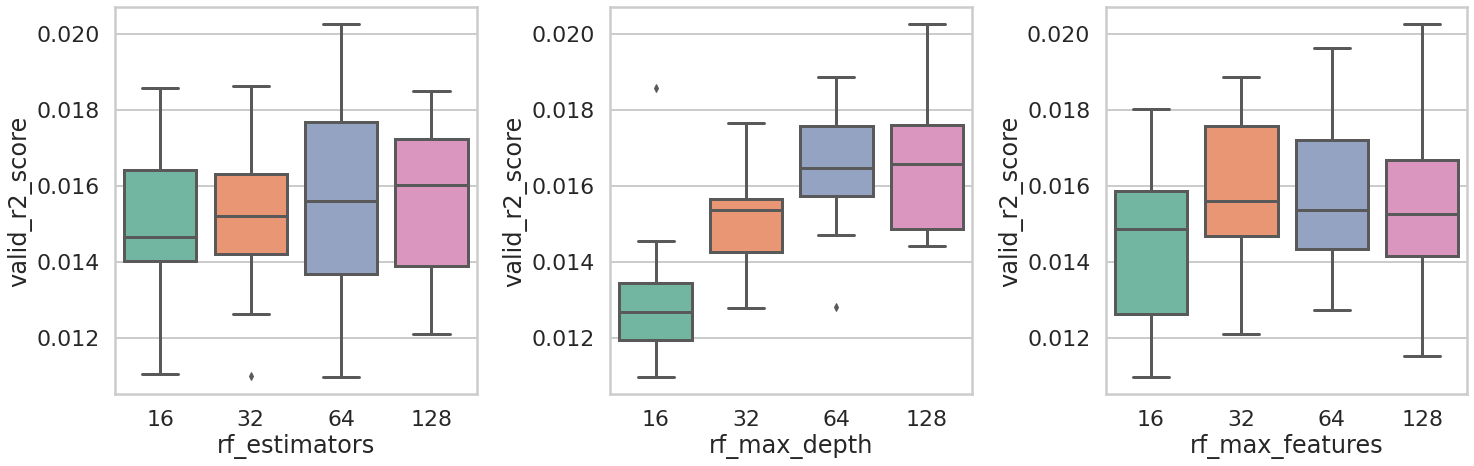

In [46]:
fig, ax = plt.subplots(1,3,figsize=(21,7))
sns.boxplot(data=perf_df, x="rf_estimators", y="valid_r2_score", ax=ax[0])
sns.boxplot(data=perf_df, x="rf_max_depth", y="valid_r2_score", ax=ax[1])
sns.boxplot(data=perf_df, x="rf_max_features", y="valid_r2_score", ax=ax[2])
fig.tight_layout()

### Random search

In [49]:
rfe_list = []
rfd_list = []
rff_list = []
valid_r2_list = []

num_trials = 50

for i in range(num_trials):
    params["rf_estimators"] = np.random.randint(8,256)
    params["rf_max_depth"] = np.random.randint(8,256)
    params["rf_max_features"] = np.random.randint(8,256)
    rfe_list.append(params["rf_estimators"])
    rfd_list.append(params["rf_max_depth"])
    rff_list.append(params["rf_max_features"])
    tp = parse.wrapper(params)
    pl = mp.ModelPipeline(tp)
    pl.train_model()
    pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
    pred_results = pred_data.get_prediction_results()
    valid_r2 = pred_results['r2_score']
    valid_r2_list.append(valid_r2)
    print(f"rf_estimators: {rf_estimator}, rf_max_depth: {rf_depth}, rf_max_features: {rf_feature}, valid_r2: {valid_r2}")

number of features: 1024


2021-04-01 20:59:08,423 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.668 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 20:59:36,858 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/4e14e3fb-d01d-41eb-add3-74b71a697328/model_metadata.json
2021-04-01 20:59:37,924 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/4e14e3fb-d01d-41eb-add3-74b71a697328/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_4e14e3fb-d01d-41eb-add3-74b71a697328.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.017170913091746676
number of features: 1024


2021-04-01 21:00:54,231 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.679 s
Loading dataset from disk.
TIMING: dataset construction took 0.090 s
Loading dataset from disk.
TIMING: dataset construction took 0.090 s
Loading dataset from disk.


2021-04-01 21:01:10,732 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/ed48c12e-ab20-407d-bc85-fe63fb418ce0/model_metadata.json
2021-04-01 21:01:11,448 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/ed48c12e-ab20-407d-bc85-fe63fb418ce0/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_ed48c12e-ab20-407d-bc85-fe63fb418ce0.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.017540606071390186
number of features: 1024


2021-04-01 21:02:27,025 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.660 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 21:03:04,411 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/192ac092-9d5e-4c59-bfc7-8a97dd58c35b/model_metadata.json
2021-04-01 21:03:06,260 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/192ac092-9d5e-4c59-bfc7-8a97dd58c35b/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_192ac092-9d5e-4c59-bfc7-8a97dd58c35b.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.015945719744887565
number of features: 1024


2021-04-01 21:04:22,580 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.706 s
Loading dataset from disk.
TIMING: dataset construction took 0.096 s
Loading dataset from disk.
TIMING: dataset construction took 0.094 s
Loading dataset from disk.


2021-04-01 21:04:49,104 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/caa41b0c-49de-4119-b065-b8c7452d0041/model_metadata.json
2021-04-01 21:04:49,836 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/caa41b0c-49de-4119-b065-b8c7452d0041/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_caa41b0c-49de-4119-b065-b8c7452d0041.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.01720113314142191
number of features: 1024


2021-04-01 21:06:05,990 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.677 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 21:06:41,980 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/3f0ff6ad-e47b-4fb6-be8f-9dc400e8fd78/model_metadata.json
2021-04-01 21:06:42,788 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/3f0ff6ad-e47b-4fb6-be8f-9dc400e8fd78/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_3f0ff6ad-e47b-4fb6-be8f-9dc400e8fd78.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.0164886568901621
number of features: 1024


2021-04-01 21:07:58,644 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.673 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.


2021-04-01 21:08:19,223 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/2b430052-70cf-4932-a16e-9196ea034184/model_metadata.json
2021-04-01 21:08:20,454 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/2b430052-70cf-4932-a16e-9196ea034184/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_2b430052-70cf-4932-a16e-9196ea034184.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.016659544835595286
number of features: 1024


2021-04-01 21:09:36,018 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.661 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 21:09:46,259 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/6a9b2732-ee23-45ae-b0b8-9f96ff5930b5/model_metadata.json
2021-04-01 21:09:46,304 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/6a9b2732-ee23-45ae-b0b8-9f96ff5930b5/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_6a9b2732-ee23-45ae-b0b8-9f96ff5930b5.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.010193783530930811
number of features: 1024


2021-04-01 21:11:02,284 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.662 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.
TIMING: dataset construction took 0.090 s
Loading dataset from disk.


2021-04-01 21:11:27,354 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/be94f6a6-edd4-4486-8214-924433dc44cc/model_metadata.json
2021-04-01 21:11:29,584 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/be94f6a6-edd4-4486-8214-924433dc44cc/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_be94f6a6-edd4-4486-8214-924433dc44cc.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.0165717139309155
number of features: 1024


2021-04-01 21:12:45,278 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.662 s
Loading dataset from disk.
TIMING: dataset construction took 0.090 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.


2021-04-01 21:13:39,306 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/d96edd15-7300-43bb-a67c-31bd1611fd0d/model_metadata.json
2021-04-01 21:13:41,138 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/d96edd15-7300-43bb-a67c-31bd1611fd0d/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_d96edd15-7300-43bb-a67c-31bd1611fd0d.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.017222005722753786
number of features: 1024


2021-04-01 21:14:57,138 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.661 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 21:15:10,447 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/675428c0-78f8-4be8-b927-2e637ca2f2bc/model_metadata.json
2021-04-01 21:15:11,329 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/675428c0-78f8-4be8-b927-2e637ca2f2bc/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_675428c0-78f8-4be8-b927-2e637ca2f2bc.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.015732696897510112
number of features: 1024


2021-04-01 21:16:27,487 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.652 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 21:16:55,541 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/c6455a6a-9b68-4226-bddc-ba2a405dac59/model_metadata.json
2021-04-01 21:16:57,214 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/c6455a6a-9b68-4226-bddc-ba2a405dac59/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_c6455a6a-9b68-4226-bddc-ba2a405dac59.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.017457490639124607
number of features: 1024


2021-04-01 21:18:12,987 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.667 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 21:18:25,391 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/66a4626f-359c-4b8f-87bb-348cb5b9c636/model_metadata.json
2021-04-01 21:18:25,678 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/66a4626f-359c-4b8f-87bb-348cb5b9c636/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_66a4626f-359c-4b8f-87bb-348cb5b9c636.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.01873191645167449
number of features: 1024


2021-04-01 21:19:41,451 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.653 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 21:20:29,265 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/8c53bf36-87e8-4383-8fea-8b727ae3fd00/model_metadata.json
2021-04-01 21:20:30,977 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/8c53bf36-87e8-4383-8fea-8b727ae3fd00/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_8c53bf36-87e8-4383-8fea-8b727ae3fd00.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.016846341020572808
number of features: 1024


2021-04-01 21:21:46,438 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.659 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.


2021-04-01 21:22:01,254 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/f0d66246-bc07-4698-921f-eaae3a4ab9fd/model_metadata.json
2021-04-01 21:22:03,807 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/f0d66246-bc07-4698-921f-eaae3a4ab9fd/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_f0d66246-bc07-4698-921f-eaae3a4ab9fd.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.017291450639489447
number of features: 1024


2021-04-01 21:23:19,314 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.658 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 21:24:13,482 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/36c85018-d1cc-4b39-91ef-99ff20128275/model_metadata.json
2021-04-01 21:24:15,560 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/36c85018-d1cc-4b39-91ef-99ff20128275/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_36c85018-d1cc-4b39-91ef-99ff20128275.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.017025215287365558
number of features: 1024


2021-04-01 21:25:30,920 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.665 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 21:26:12,712 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/f87e7361-c8f0-4cfb-9f1a-b3cffbdc982b/model_metadata.json
2021-04-01 21:26:14,246 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/f87e7361-c8f0-4cfb-9f1a-b3cffbdc982b/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_f87e7361-c8f0-4cfb-9f1a-b3cffbdc982b.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.017663850942516768
number of features: 1024


2021-04-01 21:27:29,738 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.675 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 21:28:04,609 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/f322d4a8-62a0-46d9-8ee9-235fde47d587/model_metadata.json
2021-04-01 21:28:05,099 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/f322d4a8-62a0-46d9-8ee9-235fde47d587/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_f322d4a8-62a0-46d9-8ee9-235fde47d587.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.01417242698051624
number of features: 1024


2021-04-01 21:29:20,546 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.674 s
Loading dataset from disk.
TIMING: dataset construction took 0.090 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.


2021-04-01 21:29:33,345 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/7834500d-b34a-431b-834d-4f845c12c51c/model_metadata.json
2021-04-01 21:29:34,371 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/7834500d-b34a-431b-834d-4f845c12c51c/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_7834500d-b34a-431b-834d-4f845c12c51c.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.01579939013791931
number of features: 1024


2021-04-01 21:30:49,913 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.673 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 21:31:08,404 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/c616f96a-16a4-46dc-8a76-cdbdcbf4809b/model_metadata.json
2021-04-01 21:31:09,407 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/c616f96a-16a4-46dc-8a76-cdbdcbf4809b/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_c616f96a-16a4-46dc-8a76-cdbdcbf4809b.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.01738540199614358
number of features: 1024


2021-04-01 21:32:24,995 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.688 s
Loading dataset from disk.
TIMING: dataset construction took 0.091 s
Loading dataset from disk.
TIMING: dataset construction took 0.093 s
Loading dataset from disk.


2021-04-01 21:32:41,869 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/bd5acfdc-ee94-4c03-a516-7f2ceea4a18c/model_metadata.json
2021-04-01 21:32:42,486 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/bd5acfdc-ee94-4c03-a516-7f2ceea4a18c/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_bd5acfdc-ee94-4c03-a516-7f2ceea4a18c.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.016159390644223892
number of features: 1024


2021-04-01 21:33:57,877 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.661 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 21:34:14,734 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/214011c2-9ab5-4440-9b79-03818ac24eec/model_metadata.json
2021-04-01 21:34:15,561 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/214011c2-9ab5-4440-9b79-03818ac24eec/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_214011c2-9ab5-4440-9b79-03818ac24eec.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.01765468280042848
number of features: 1024


2021-04-01 21:35:31,125 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.661 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 21:35:38,788 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/cf1430c6-578e-44ba-8abf-3bc8ebf87aef/model_metadata.json
2021-04-01 21:35:39,525 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/cf1430c6-578e-44ba-8abf-3bc8ebf87aef/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_cf1430c6-578e-44ba-8abf-3bc8ebf87aef.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.015360812097494958
number of features: 1024


2021-04-01 21:36:55,337 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.679 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.


2021-04-01 21:37:27,603 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/67a7a6f2-d29a-499f-a291-74d158320590/model_metadata.json
2021-04-01 21:37:29,958 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/67a7a6f2-d29a-499f-a291-74d158320590/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_67a7a6f2-d29a-499f-a291-74d158320590.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.01700897437287119
number of features: 1024


2021-04-01 21:38:45,423 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.667 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 21:38:53,755 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/073a5e27-ff3c-4882-8ca5-ae108ec5ae96/model_metadata.json
2021-04-01 21:38:53,920 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/073a5e27-ff3c-4882-8ca5-ae108ec5ae96/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_073a5e27-ff3c-4882-8ca5-ae108ec5ae96.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.018600583410159244
number of features: 1024


2021-04-01 21:40:09,721 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.662 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 21:40:57,650 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/9b7f852e-9f61-42e1-9eaf-d116da8393f2/model_metadata.json
2021-04-01 21:40:59,013 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/9b7f852e-9f61-42e1-9eaf-d116da8393f2/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_9b7f852e-9f61-42e1-9eaf-d116da8393f2.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.016557937763571506
number of features: 1024


2021-04-01 21:42:14,864 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.668 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 21:42:46,162 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/800571ae-adb4-4880-975f-a1d897177cea/model_metadata.json
2021-04-01 21:42:48,134 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/800571ae-adb4-4880-975f-a1d897177cea/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_800571ae-adb4-4880-975f-a1d897177cea.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.016859669364341023
number of features: 1024


2021-04-01 21:44:03,910 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.662 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 21:44:44,179 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/dc818d2b-1223-443b-8681-d94753a3d194/model_metadata.json
2021-04-01 21:44:45,352 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/dc818d2b-1223-443b-8681-d94753a3d194/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_dc818d2b-1223-443b-8681-d94753a3d194.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.017968192526624294
number of features: 1024


2021-04-01 21:46:00,884 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.668 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.


2021-04-01 21:46:53,796 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/dec14196-d794-4945-8497-63cc079ed74d/model_metadata.json
2021-04-01 21:46:55,718 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/dec14196-d794-4945-8497-63cc079ed74d/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_dec14196-d794-4945-8497-63cc079ed74d.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.01896125723318487
number of features: 1024


2021-04-01 21:48:11,273 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.667 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.


2021-04-01 21:48:28,701 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/cef75c03-7c46-4e9e-a749-4e48b2aaa192/model_metadata.json
2021-04-01 21:48:30,246 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/cef75c03-7c46-4e9e-a749-4e48b2aaa192/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_cef75c03-7c46-4e9e-a749-4e48b2aaa192.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.017575990589876356
number of features: 1024


2021-04-01 21:49:45,810 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.660 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 21:50:10,938 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/9f1d20c0-5647-4e9c-850b-7c91fb50897f/model_metadata.json
2021-04-01 21:50:13,227 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/9f1d20c0-5647-4e9c-850b-7c91fb50897f/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_9f1d20c0-5647-4e9c-850b-7c91fb50897f.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.016865097111285365
number of features: 1024


2021-04-01 21:51:29,001 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.670 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.
TIMING: dataset construction took 0.091 s
Loading dataset from disk.


2021-04-01 21:51:41,098 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/25fb37a4-dabe-42fe-8b41-bb6506db8f7c/model_metadata.json
2021-04-01 21:51:42,396 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/25fb37a4-dabe-42fe-8b41-bb6506db8f7c/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_25fb37a4-dabe-42fe-8b41-bb6506db8f7c.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.017144527408341603
number of features: 1024


2021-04-01 21:52:58,287 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.666 s
Loading dataset from disk.
TIMING: dataset construction took 0.091 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 21:53:05,928 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/12cf60cf-865a-462b-aaf1-3fc1215af064/model_metadata.json
2021-04-01 21:53:06,435 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/12cf60cf-865a-462b-aaf1-3fc1215af064/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_12cf60cf-865a-462b-aaf1-3fc1215af064.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.018357189861050727
number of features: 1024


2021-04-01 21:54:21,867 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.667 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 21:54:47,675 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/82e9f7c1-cfc2-4cf9-8cfa-029e059bd10d/model_metadata.json
2021-04-01 21:54:48,675 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/82e9f7c1-cfc2-4cf9-8cfa-029e059bd10d/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_82e9f7c1-cfc2-4cf9-8cfa-029e059bd10d.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.017545147823447738
number of features: 1024


2021-04-01 21:56:04,438 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.659 s
Loading dataset from disk.
TIMING: dataset construction took 0.090 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.


2021-04-01 21:56:42,490 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/f31b6164-c4af-4245-87b6-b367a2899a7d/model_metadata.json
2021-04-01 21:56:43,912 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/f31b6164-c4af-4245-87b6-b367a2899a7d/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_f31b6164-c4af-4245-87b6-b367a2899a7d.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.018164512454204473
number of features: 1024


2021-04-01 21:57:59,683 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.659 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 21:58:21,440 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/b602bfb9-4190-4001-9549-f1770822b72b/model_metadata.json
2021-04-01 21:58:23,590 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/b602bfb9-4190-4001-9549-f1770822b72b/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_b602bfb9-4190-4001-9549-f1770822b72b.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.01691586241324594
number of features: 1024


2021-04-01 21:59:39,139 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.671 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 22:00:05,382 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/6aafa49b-dcc9-41e1-b9db-c1c2f656b8c4/model_metadata.json
2021-04-01 22:00:07,867 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/6aafa49b-dcc9-41e1-b9db-c1c2f656b8c4/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_6aafa49b-dcc9-41e1-b9db-c1c2f656b8c4.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.016792872334578268
number of features: 1024


2021-04-01 22:01:23,788 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.670 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.
TIMING: dataset construction took 0.090 s
Loading dataset from disk.


2021-04-01 22:01:44,494 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/89113ba1-fa92-479a-b2c1-c9ace950b5ed/model_metadata.json
2021-04-01 22:01:46,450 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/89113ba1-fa92-479a-b2c1-c9ace950b5ed/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_89113ba1-fa92-479a-b2c1-c9ace950b5ed.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.017259777027142098
number of features: 1024


2021-04-01 22:03:02,298 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.658 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 22:03:14,142 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/49c8dca1-161f-40c2-b456-186c09890680/model_metadata.json
2021-04-01 22:03:15,040 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/49c8dca1-161f-40c2-b456-186c09890680/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_49c8dca1-161f-40c2-b456-186c09890680.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.016086175312020723
number of features: 1024


2021-04-01 22:04:30,604 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.655 s
Loading dataset from disk.
TIMING: dataset construction took 0.090 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 22:04:45,323 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/d66d1d94-11b7-49e1-bedd-3894b93bdc9a/model_metadata.json
2021-04-01 22:04:46,536 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/d66d1d94-11b7-49e1-bedd-3894b93bdc9a/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_d66d1d94-11b7-49e1-bedd-3894b93bdc9a.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.018198414868559554
number of features: 1024


2021-04-01 22:06:02,167 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.662 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 22:06:09,457 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/8d3ad9f9-d191-4cf5-8788-fbd9fe4a833b/model_metadata.json
2021-04-01 22:06:09,709 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/8d3ad9f9-d191-4cf5-8788-fbd9fe4a833b/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_8d3ad9f9-d191-4cf5-8788-fbd9fe4a833b.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.021973661650190657
number of features: 1024


2021-04-01 22:07:25,224 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.658 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 22:07:45,150 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/0ea809fd-e8ef-4a82-ad38-2a6f54419351/model_metadata.json
2021-04-01 22:07:46,607 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/0ea809fd-e8ef-4a82-ad38-2a6f54419351/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_0ea809fd-e8ef-4a82-ad38-2a6f54419351.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.01653971679235189
number of features: 1024


2021-04-01 22:09:02,395 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.657 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 22:09:49,901 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/88980598-6296-4320-b134-9fb7e6caef76/model_metadata.json
2021-04-01 22:09:52,243 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/88980598-6296-4320-b134-9fb7e6caef76/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_88980598-6296-4320-b134-9fb7e6caef76.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.017720314036372198
number of features: 1024


2021-04-01 22:11:07,957 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.661 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 22:11:13,457 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/514363ca-f23b-499a-b185-f75c96427a6a/model_metadata.json
2021-04-01 22:11:13,506 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/514363ca-f23b-499a-b185-f75c96427a6a/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_514363ca-f23b-499a-b185-f75c96427a6a.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.010566653211912858
number of features: 1024


2021-04-01 22:12:29,103 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.656 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 22:12:47,620 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/be772d59-d8f1-49a3-b94f-8ce142d608f1/model_metadata.json
2021-04-01 22:12:47,956 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/be772d59-d8f1-49a3-b94f-8ce142d608f1/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_be772d59-d8f1-49a3-b94f-8ce142d608f1.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.014560713986218055
number of features: 1024


2021-04-01 22:14:03,824 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.727 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 22:14:28,239 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/915bcd17-6bcd-4619-81df-63f71a5ac3b2/model_metadata.json
2021-04-01 22:14:29,152 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/915bcd17-6bcd-4619-81df-63f71a5ac3b2/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_915bcd17-6bcd-4619-81df-63f71a5ac3b2.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.017618790033208875
number of features: 1024


2021-04-01 22:15:44,590 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.659 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.


2021-04-01 22:16:01,773 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/43621a6f-8459-40e8-89a2-6572c202f809/model_metadata.json
2021-04-01 22:16:01,963 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/43621a6f-8459-40e8-89a2-6572c202f809/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_43621a6f-8459-40e8-89a2-6572c202f809.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.014146908631295196
number of features: 1024


2021-04-01 22:17:17,313 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.655 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 22:17:56,490 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/cd23bbd0-6f22-4092-b9b7-7fd9b540ff2c/model_metadata.json
2021-04-01 22:17:57,874 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/cd23bbd0-6f22-4092-b9b7-7fd9b540ff2c/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_cd23bbd0-6f22-4092-b9b7-7fd9b540ff2c.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.017903814813814645
number of features: 1024


2021-04-01 22:19:13,509 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.656 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.


2021-04-01 22:19:21,974 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/005320c9-a354-4bb0-a473-090ac9a8b6a9/model_metadata.json
2021-04-01 22:19:22,260 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/005320c9-a354-4bb0-a473-090ac9a8b6a9/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_005320c9-a354-4bb0-a473-090ac9a8b6a9.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.019139945796135427
number of features: 1024


2021-04-01 22:20:37,709 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.657 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.


2021-04-01 22:21:10,597 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/596cc9f0-2448-43bd-bf04-b3ef9e84d80c/model_metadata.json
2021-04-01 22:21:11,570 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/596cc9f0-2448-43bd-bf04-b3ef9e84d80c/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_596cc9f0-2448-43bd-bf04-b3ef9e84d80c.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.016201285636549212
number of features: 1024


2021-04-01 22:22:27,120 Previous dataset split restored


n_cnt [18642.]
y_means [5.19196307]
y_stds [1.21382351]
TIMING: dataset construction took 0.663 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.


2021-04-01 22:22:37,010 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/ff2a4aba-3b41-4c56-b246-99c0d0f1676d/model_metadata.json
2021-04-01 22:22:37,681 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/ff2a4aba-3b41-4c56-b246-99c0d0f1676d/model_metrics.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_ff2a4aba-3b41-4c56-b246-99c0d0f1676d.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: 0.013679121613869971


In [50]:
perf_df = pd.DataFrame({"rf_estimators": rfe_list, "rf_max_depth": rfd_list, "rf_max_features": rff_list, "valid_r2_score": valid_r2_list})
perf_df.sort_values(by="valid_r2_score", ascending=False)

,rf_estimators,rf_max_depth,rf_max_features,valid_r2_score
39,25,157,68,0.021974
47,32,67,95,0.019140
27,196,238,249,0.018961
11,29,156,241,0.018732
23,33,32,120,0.018601
31,50,225,25,0.018357
38,123,196,56,0.018198
33,154,98,214,0.018165
26,164,48,246,0.017968
46,160,69,222,0.017904


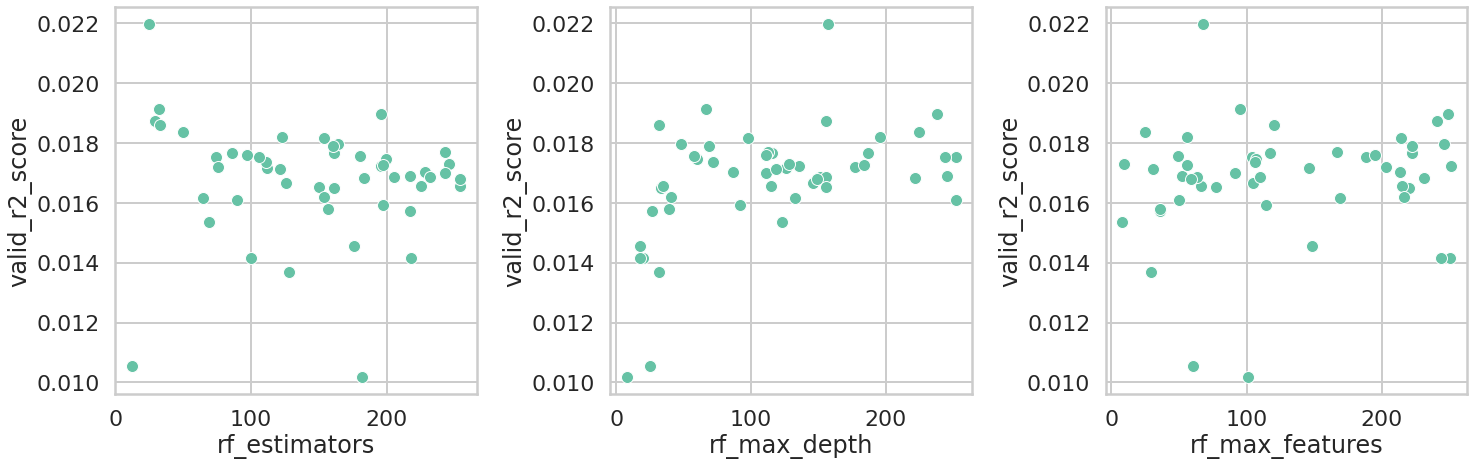

In [51]:
fig, ax = plt.subplots(1,3,figsize=(21,7))
sns.scatterplot(data=perf_df, x="rf_estimators", y="valid_r2_score", ax=ax[0])
sns.scatterplot(data=perf_df, x="rf_max_depth", y="valid_r2_score", ax=ax[1])
sns.scatterplot(data=perf_df, x="rf_max_features", y="valid_r2_score", ax=ax[2])
fig.tight_layout()

### Bayesian search

In [52]:
#define loss function
def lossfn(p):
    params["rf_estimators"] = int(p["rf_estimator"])
    params["rf_max_depth"] = int(p["rf_depth"])
    params["rf_max_features"] = int(p["rf_feature"])
    
    tparam = parse.wrapper(params)
    pl = mp.ModelPipeline(tparam)
    pl.train_model()
    perf_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
    pred_results = perf_data.get_prediction_results()
    r2 = pred_results['r2_score']
    return {'loss': 1-r2, 
            'status': STATUS_OK, 
            'model': tparam.model_tarball_path, 
            'rf_estimator': params["rf_estimators"],
            'rf_depth': params["rf_max_depth"],
            'rf_feature': params["rf_max_features"]}

space = {
    "rf_estimator": hp.uniform("rf_estimator", 8, 256),
    "rf_depth": hp.uniform("rf_depth", 8, 256),
    "rf_feature": hp.uniform("rf_feature", 8, 256)
}

In [53]:
trials = Trials()
best = fmin(lossfn, space, algo=tpe.suggest, max_evals=20, trials=trials)

number of features: 1024
  0%|          | 0/20 [01:11<?, ?it/s, best loss: ?]

2021-04-01 22:25:24,282 Previous dataset split restored


n_cnt
[18642.]
y_means
[5.19196307]
y_stds
[1.21382351]
TIMING: dataset construction took 0.661 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.
TIMING: dataset construction took 0.091 s
Loading dataset from disk.
  0%|          | 0/20 [01:17<?, ?it/s, best loss: ?]

2021-04-01 22:25:47,627 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/be0f71e6-a1a7-4e9c-b1be-438336c557fd/model_metadata.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_be0f71e6-a1a7-4e9c-b1be-438336c557fd.tar.gz
  0%|          | 0/20 [01:39<?, ?it/s, best loss: ?]

2021-04-01 22:25:48,276 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/be0f71e6-a1a7-4e9c-b1be-438336c557fd/model_metrics.json


number of features: 1024
  5%|▌         | 1/20 [02:50<31:36, 99.84s/it, best loss: 0.9830315736597234]

2021-04-01 22:27:04,049 Previous dataset split restored


n_cnt
[18642.]
y_means
[5.19196307]
y_stds
[1.21382351]
TIMING: dataset construction took 0.676 s
Loading dataset from disk.
TIMING: dataset construction took 0.091 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.
  5%|▌         | 1/20 [02:57<31:36, 99.84s/it, best loss: 0.9830315736597234]

2021-04-01 22:27:47,118 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/d21398fd-4ec1-46e8-b0b3-41b65beb7a1b/model_metadata.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_d21398fd-4ec1-46e8-b0b3-41b65beb7a1b.tar.gz
  5%|▌         | 1/20 [03:40<31:36, 99.84s/it, best loss: 0.9830315736597234]

2021-04-01 22:27:48,709 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/d21398fd-4ec1-46e8-b0b3-41b65beb7a1b/model_metrics.json


number of features: 1024
 10%|█         | 2/20 [04:51<31:48, 106.02s/it, best loss: 0.9830315736597234]

2021-04-01 22:29:04,428 Previous dataset split restored


n_cnt
[18642.]
y_means
[5.19196307]
y_stds
[1.21382351]
TIMING: dataset construction took 0.660 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.
 10%|█         | 2/20 [04:57<31:48, 106.02s/it, best loss: 0.9830315736597234]

2021-04-01 22:29:44,174 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/b4950c8a-9ee6-4879-8461-e7272a945396/model_metadata.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_b4950c8a-9ee6-4879-8461-e7272a945396.tar.gz
 10%|█         | 2/20 [05:38<31:48, 106.02s/it, best loss: 0.9830315736597234]

2021-04-01 22:29:46,458 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/b4950c8a-9ee6-4879-8461-e7272a945396/model_metrics.json


number of features: 1024
 15%|█▌        | 3/20 [06:49<31:02, 109.55s/it, best loss: 0.9830315736597234]

2021-04-01 22:31:02,325 Previous dataset split restored


n_cnt
[18642.]
y_means
[5.19196307]
y_stds
[1.21382351]
TIMING: dataset construction took 0.664 s
Loading dataset from disk.
TIMING: dataset construction took 0.092 s
Loading dataset from disk.
TIMING: dataset construction took 0.093 s
Loading dataset from disk.
 15%|█▌        | 3/20 [06:55<31:02, 109.55s/it, best loss: 0.9830315736597234]

2021-04-01 22:31:09,524 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/e5738617-dd2a-4ca6-860d-526ee7af0f10/model_metadata.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_e5738617-dd2a-4ca6-860d-526ee7af0f10.tar.gz
 15%|█▌        | 3/20 [07:01<31:02, 109.55s/it, best loss: 0.9830315736597234]

2021-04-01 22:31:09,580 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/e5738617-dd2a-4ca6-860d-526ee7af0f10/model_metrics.json


number of features: 1024
 20%|██        | 4/20 [08:12<27:05, 101.60s/it, best loss: 0.9830315736597234]

2021-04-01 22:32:25,125 Previous dataset split restored


n_cnt
[18642.]
y_means
[5.19196307]
y_stds
[1.21382351]
TIMING: dataset construction took 0.663 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.093 s
Loading dataset from disk.
 20%|██        | 4/20 [08:18<27:05, 101.60s/it, best loss: 0.9830315736597234]

2021-04-01 22:32:54,894 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/af8010a0-2467-4ff7-b9f0-98a8d40267e7/model_metadata.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_af8010a0-2467-4ff7-b9f0-98a8d40267e7.tar.gz
 20%|██        | 4/20 [08:47<27:05, 101.60s/it, best loss: 0.9830315736597234]

2021-04-01 22:32:55,977 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/af8010a0-2467-4ff7-b9f0-98a8d40267e7/model_metrics.json


number of features: 1024
 25%|██▌       | 5/20 [09:59<25:45, 103.04s/it, best loss: 0.9830315736597234]

2021-04-01 22:34:12,063 Previous dataset split restored


n_cnt
[18642.]
y_means
[5.19196307]
y_stds
[1.21382351]
TIMING: dataset construction took 0.656 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.
 25%|██▌       | 5/20 [10:05<25:45, 103.04s/it, best loss: 0.9830315736597234]

2021-04-01 22:34:49,234 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/c0fbd212-e242-433f-b0ac-f46c26a519fe/model_metadata.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_c0fbd212-e242-433f-b0ac-f46c26a519fe.tar.gz
 25%|██▌       | 5/20 [10:42<25:45, 103.04s/it, best loss: 0.9830315736597234]

2021-04-01 22:34:50,615 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/c0fbd212-e242-433f-b0ac-f46c26a519fe/model_metrics.json


number of features: 1024
 30%|███       | 6/20 [11:53<24:51, 106.52s/it, best loss: 0.9814497066360043]

2021-04-01 22:36:06,744 Previous dataset split restored


n_cnt
[18642.]
y_means
[5.19196307]
y_stds
[1.21382351]
TIMING: dataset construction took 0.647 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.
 30%|███       | 6/20 [11:59<24:51, 106.52s/it, best loss: 0.9814497066360043]

2021-04-01 22:36:15,594 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/60a2211f-78b5-413d-875e-544c0c2e8c32/model_metadata.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_60a2211f-78b5-413d-875e-544c0c2e8c32.tar.gz
 30%|███       | 6/20 [12:07<24:51, 106.52s/it, best loss: 0.9814497066360043]

2021-04-01 22:36:16,050 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/60a2211f-78b5-413d-875e-544c0c2e8c32/model_metrics.json


number of features: 1024
 35%|███▌      | 7/20 [13:18<21:42, 100.19s/it, best loss: 0.9814497066360043]

2021-04-01 22:37:31,810 Previous dataset split restored


n_cnt
[18642.]
y_means
[5.19196307]
y_stds
[1.21382351]
TIMING: dataset construction took 0.650 s
Loading dataset from disk.
TIMING: dataset construction took 0.085 s
Loading dataset from disk.
TIMING: dataset construction took 0.085 s
Loading dataset from disk.
 35%|███▌      | 7/20 [13:24<21:42, 100.19s/it, best loss: 0.9814497066360043]

2021-04-01 22:38:05,145 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/5f1e7734-c44e-4431-a5d5-cb3f0b140d5b/model_metadata.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_5f1e7734-c44e-4431-a5d5-cb3f0b140d5b.tar.gz
 35%|███▌      | 7/20 [13:58<21:42, 100.19s/it, best loss: 0.9814497066360043]

2021-04-01 22:38:06,501 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/5f1e7734-c44e-4431-a5d5-cb3f0b140d5b/model_metrics.json


number of features: 1024
 40%|████      | 8/20 [15:09<20:39, 103.27s/it, best loss: 0.9814497066360043]

2021-04-01 22:39:22,023 Previous dataset split restored


n_cnt
[18642.]
y_means
[5.19196307]
y_stds
[1.21382351]
TIMING: dataset construction took 0.650 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
 40%|████      | 8/20 [15:14<20:39, 103.27s/it, best loss: 0.9814497066360043]

2021-04-01 22:40:00,464 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/08bc9e30-56f6-4c39-8b82-a5c5534fba14/model_metadata.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_08bc9e30-56f6-4c39-8b82-a5c5534fba14.tar.gz
 40%|████      | 8/20 [15:54<20:39, 103.27s/it, best loss: 0.9814497066360043]

2021-04-01 22:40:02,848 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/08bc9e30-56f6-4c39-8b82-a5c5534fba14/model_metrics.json


number of features: 1024
 45%|████▌     | 9/20 [17:05<19:39, 107.22s/it, best loss: 0.9814497066360043]

2021-04-01 22:41:18,842 Previous dataset split restored


n_cnt
[18642.]
y_means
[5.19196307]
y_stds
[1.21382351]
TIMING: dataset construction took 0.655 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.
 45%|████▌     | 9/20 [17:11<19:39, 107.22s/it, best loss: 0.9814497066360043]

2021-04-01 22:41:24,535 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/8f3424af-94af-4e37-8861-8903ae506ab7/model_metadata.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_8f3424af-94af-4e37-8861-8903ae506ab7.tar.gz
 45%|████▌     | 9/20 [17:16<19:39, 107.22s/it, best loss: 0.9814497066360043]

2021-04-01 22:41:24,651 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/8f3424af-94af-4e37-8861-8903ae506ab7/model_metrics.json


number of features: 1024
 50%|█████     | 10/20 [18:27<16:35, 99.57s/it, best loss: 0.9814497066360043]

2021-04-01 22:42:40,168 Previous dataset split restored


n_cnt
[18642.]
y_means
[5.19196307]
y_stds
[1.21382351]
TIMING: dataset construction took 0.658 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.
 50%|█████     | 10/20 [18:33<16:35, 99.57s/it, best loss: 0.9814497066360043]

2021-04-01 22:42:54,593 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/2edfc039-abc2-4a07-924d-cd0e20f8ac04/model_metadata.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_2edfc039-abc2-4a07-924d-cd0e20f8ac04.tar.gz
 50%|█████     | 10/20 [18:47<16:35, 99.57s/it, best loss: 0.9814497066360043]

2021-04-01 22:42:55,992 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/2edfc039-abc2-4a07-924d-cd0e20f8ac04/model_metrics.json


number of features: 1024
 55%|█████▌    | 11/20 [19:58<14:33, 97.11s/it, best loss: 0.9814497066360043]

2021-04-01 22:44:11,801 Previous dataset split restored


n_cnt
[18642.]
y_means
[5.19196307]
y_stds
[1.21382351]
TIMING: dataset construction took 0.647 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
 55%|█████▌    | 11/20 [20:04<14:33, 97.11s/it, best loss: 0.9814497066360043]

2021-04-01 22:44:24,363 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/0e7b85b4-f783-47d1-9e77-87d8e6ce72cc/model_metadata.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_0e7b85b4-f783-47d1-9e77-87d8e6ce72cc.tar.gz
 55%|█████▌    | 11/20 [20:17<14:33, 97.11s/it, best loss: 0.9814497066360043]

2021-04-01 22:44:25,536 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/0e7b85b4-f783-47d1-9e77-87d8e6ce72cc/model_metrics.json


number of features: 1024
 60%|██████    | 12/20 [21:28<12:38, 94.84s/it, best loss: 0.9814497066360043]

2021-04-01 22:45:41,192 Previous dataset split restored


n_cnt
[18642.]
y_means
[5.19196307]
y_stds
[1.21382351]
TIMING: dataset construction took 0.678 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.090 s
Loading dataset from disk.
 60%|██████    | 12/20 [21:34<12:38, 94.84s/it, best loss: 0.9814497066360043]

2021-04-01 22:46:05,128 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/08c8d2dd-cd40-429b-8a5f-c71790c7ee67/model_metadata.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_08c8d2dd-cd40-429b-8a5f-c71790c7ee67.tar.gz
 60%|██████    | 12/20 [21:57<12:38, 94.84s/it, best loss: 0.9814497066360043]

2021-04-01 22:46:05,700 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/08c8d2dd-cd40-429b-8a5f-c71790c7ee67/model_metrics.json


number of features: 1024
 65%|██████▌   | 13/20 [23:08<11:15, 96.43s/it, best loss: 0.9814497066360043]

2021-04-01 22:47:21,352 Previous dataset split restored


n_cnt
[18642.]
y_means
[5.19196307]
y_stds
[1.21382351]
TIMING: dataset construction took 0.651 s
Loading dataset from disk.
TIMING: dataset construction took 0.093 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
 65%|██████▌   | 13/20 [23:14<11:15, 96.43s/it, best loss: 0.9814497066360043]

2021-04-01 22:47:59,169 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/6b4f45f3-97a1-4e60-bca8-e629d555f70b/model_metadata.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_6b4f45f3-97a1-4e60-bca8-e629d555f70b.tar.gz
 65%|██████▌   | 13/20 [23:51<11:15, 96.43s/it, best loss: 0.9814497066360043]

2021-04-01 22:48:00,387 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/6b4f45f3-97a1-4e60-bca8-e629d555f70b/model_metrics.json


number of features: 1024
 70%|███████   | 14/20 [25:03<10:11, 101.91s/it, best loss: 0.9814497066360043]

2021-04-01 22:49:16,200 Previous dataset split restored


n_cnt
[18642.]
y_means
[5.19196307]
y_stds
[1.21382351]
TIMING: dataset construction took 0.656 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
 70%|███████   | 14/20 [25:09<10:11, 101.91s/it, best loss: 0.9814497066360043]

2021-04-01 22:49:27,755 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/6956f770-8135-49eb-90d6-e3342bc2eb7f/model_metadata.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_6956f770-8135-49eb-90d6-e3342bc2eb7f.tar.gz
 70%|███████   | 14/20 [25:20<10:11, 101.91s/it, best loss: 0.9814497066360043]

2021-04-01 22:49:28,796 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/6956f770-8135-49eb-90d6-e3342bc2eb7f/model_metrics.json


number of features: 1024
 75%|███████▌  | 15/20 [26:31<08:09, 97.86s/it, best loss: 0.9814497066360043]

2021-04-01 22:50:44,415 Previous dataset split restored


n_cnt
[18642.]
y_means
[5.19196307]
y_stds
[1.21382351]
TIMING: dataset construction took 0.658 s
Loading dataset from disk.
TIMING: dataset construction took 0.088 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.
 75%|███████▌  | 15/20 [26:37<08:09, 97.86s/it, best loss: 0.9814497066360043]

2021-04-01 22:51:17,133 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/6d8e9e3b-eb2f-4788-ac18-e07ddb991ece/model_metadata.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_6d8e9e3b-eb2f-4788-ac18-e07ddb991ece.tar.gz
 75%|███████▌  | 15/20 [27:10<08:09, 97.86s/it, best loss: 0.9814497066360043]

2021-04-01 22:51:19,084 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/6d8e9e3b-eb2f-4788-ac18-e07ddb991ece/model_metrics.json


number of features: 1024
 80%|████████  | 16/20 [28:21<06:46, 101.60s/it, best loss: 0.9814497066360043]

2021-04-01 22:52:34,502 Previous dataset split restored


n_cnt
[18642.]
y_means
[5.19196307]
y_stds
[1.21382351]
TIMING: dataset construction took 0.657 s
Loading dataset from disk.
TIMING: dataset construction took 0.090 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
 80%|████████  | 16/20 [28:27<06:46, 101.60s/it, best loss: 0.9814497066360043]

2021-04-01 22:52:52,652 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/00b92abc-7df2-45bd-ba1e-3eca5c90132b/model_metadata.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_00b92abc-7df2-45bd-ba1e-3eca5c90132b.tar.gz
 80%|████████  | 16/20 [28:46<06:46, 101.60s/it, best loss: 0.9814497066360043]

2021-04-01 22:52:54,840 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/00b92abc-7df2-45bd-ba1e-3eca5c90132b/model_metrics.json


number of features: 1024
 85%|████████▌ | 17/20 [29:57<04:59, 99.84s/it, best loss: 0.9814497066360043]

2021-04-01 22:54:10,509 Previous dataset split restored


n_cnt
[18642.]
y_means
[5.19196307]
y_stds
[1.21382351]
TIMING: dataset construction took 0.653 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.
TIMING: dataset construction took 0.092 s
Loading dataset from disk.
 85%|████████▌ | 17/20 [30:03<04:59, 99.84s/it, best loss: 0.9814497066360043]

2021-04-01 22:54:25,388 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/68247bbd-0ecd-4f19-af04-04a88d53040f/model_metadata.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_68247bbd-0ecd-4f19-af04-04a88d53040f.tar.gz
 85%|████████▌ | 17/20 [30:17<04:59, 99.84s/it, best loss: 0.9814497066360043]

2021-04-01 22:54:26,075 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/68247bbd-0ecd-4f19-af04-04a88d53040f/model_metrics.json


number of features: 1024
 90%|█████████ | 18/20 [31:28<03:14, 97.25s/it, best loss: 0.9814497066360043]

2021-04-01 22:55:41,730 Previous dataset split restored


n_cnt
[18642.]
y_means
[5.19196307]
y_stds
[1.21382351]
TIMING: dataset construction took 0.649 s
Loading dataset from disk.
TIMING: dataset construction took 0.087 s
Loading dataset from disk.
TIMING: dataset construction took 0.086 s
Loading dataset from disk.
 90%|█████████ | 18/20 [31:34<03:14, 97.25s/it, best loss: 0.9814497066360043]

2021-04-01 22:56:00,792 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/646537e5-3544-4292-b8f5-6fe82257c311/model_metadata.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_646537e5-3544-4292-b8f5-6fe82257c311.tar.gz
 90%|█████████ | 18/20 [31:53<03:14, 97.25s/it, best loss: 0.9814497066360043]

2021-04-01 22:56:02,005 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/646537e5-3544-4292-b8f5-6fe82257c311/model_metrics.json


number of features: 1024
 95%|█████████▌| 19/20 [33:04<01:36, 96.85s/it, best loss: 0.9814497066360043]

2021-04-01 22:57:17,253 Previous dataset split restored


n_cnt
[18642.]
y_means
[5.19196307]
y_stds
[1.21382351]
TIMING: dataset construction took 0.655 s
Loading dataset from disk.
TIMING: dataset construction took 0.084 s
Loading dataset from disk.
TIMING: dataset construction took 0.085 s
Loading dataset from disk.
 95%|█████████▌| 19/20 [33:10<01:36, 96.85s/it, best loss: 0.9814497066360043]

2021-04-01 22:57:27,100 Wrote model metadata to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/65a788c8-ef4a-4816-a856-5e4fed4eeb4c/model_metadata.json


Wrote model tarball to ampl_output/CYP3A4_cur_delaney_model_65a788c8-ef4a-4816-a856-5e4fed4eeb4c.tar.gz
 95%|█████████▌| 19/20 [33:19<01:36, 96.85s/it, best loss: 0.9814497066360043]

2021-04-01 22:57:27,878 Wrote model metrics to file ampl_output/CYP3A4_cur_delaney/RF_ecfp_scaffold_regression/65a788c8-ef4a-4816-a856-5e4fed4eeb4c/model_metrics.json


100%|██████████| 20/20 [33:19<00:00, 99.97s/it, best loss: 0.9814497066360043]


(0.2, 0.6)

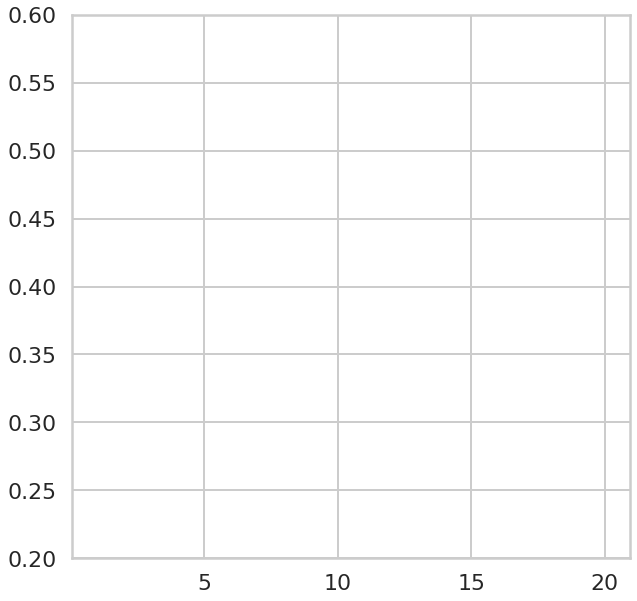

In [54]:
r2_list = [1-trials.trials[i]["result"]["loss"] for i in range(len(trials.trials))]
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.lineplot(x=list(range(1,len(trials.trials)+1)), y=r2_list, ax=ax)
ax.set_ylim(0.2,0.6)

In [55]:
rfe_list = [trials.trials[i]["result"]["rf_estimator"] for i in range(len(trials.trials))]
rfd_list = [trials.trials[i]["result"]["rf_depth"] for i in range(len(trials.trials))]
rff_list = [trials.trials[i]["result"]["rf_feature"] for i in range(len(trials.trials))]

In [56]:
perf_df = pd.DataFrame({"rf_estimators": rfe_list, "rf_max_depth": rfd_list, "rf_max_features": rff_list, "valid_r2_score": r2_list})
perf_df.sort_values(by="valid_r2_score", ascending=False)

,rf_estimators,rf_max_depth,rf_max_features,valid_r2_score
5,147,232,220,0.018550
15,213,75,115,0.017457
11,118,93,38,0.017258
10,140,92,40,0.017161
16,220,97,32,0.017096
12,123,31,208,0.016971
0,114,37,200,0.016968
7,143,239,192,0.016953
18,120,94,97,0.016913
3,20,19,201,0.016819


#### Save Bayesian optimization trial object and continue later

In [57]:
# save the trial object
trial_file = os.path.join("hp_trial.pkl")
with open(trial_file, "wb") as f:
    pickle.dump(trials, f)

In [58]:
# load the trial object
with open(trial_file, "rb") as f:
    new_trials = pickle.load(f)

In [ ]:
# continue HPO
best = fmin(lossfn, space, algo=tpe.suggest, max_evals=50, trials=new_trials)

  0%|          | 0/30 [00:00<?, ?it/s, best loss: ?]

(0.2, 0.6)

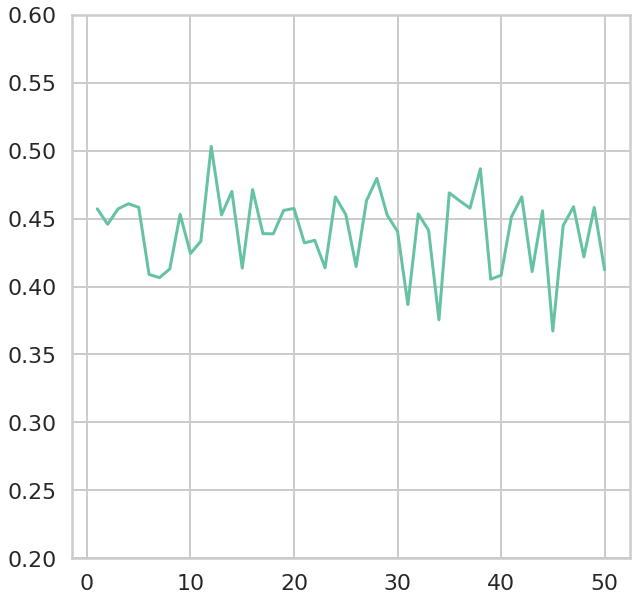

In [ ]:
r2_list = [1-new_trials.trials[i]["result"]["loss"] for i in range(len(new_trials.trials))]
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.lineplot(x=list(range(1,len(new_trials.trials)+1)), y=r2_list, ax=ax)
ax.set_ylim(0.2,0.6)

In [ ]:
rfe_list = [new_trials.trials[i]["result"]["rf_estimator"] for i in range(len(new_trials.trials))]
rfd_list = [new_trials.trials[i]["result"]["rf_depth"] for i in range(len(new_trials.trials))]
rff_list = [new_trials.trials[i]["result"]["rf_feature"] for i in range(len(new_trials.trials))]

In [ ]:
perf_df = pd.DataFrame({"rf_estimators": rfe_list, "rf_max_depth": rfd_list, "rf_max_features": rff_list, "valid_r2_score": r2_list})
perf_df.sort_values(by="valid_r2_score", ascending=False)

,rf_estimators,rf_max_depth,rf_max_features,valid_r2_score
11,21,53,232,0.503078
37,21,68,73,0.486641
27,78,130,59,0.479570
15,75,178,153,0.471293
13,182,213,155,0.469997
34,47,27,127,0.468915
41,222,73,177,0.465952
23,75,138,244,0.465900
26,52,98,198,0.463136
35,25,40,236,0.463046
